# Structure des bandes des phonons (Justin Harvengt : ScSbPd)

## Import

In [30]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Données

In [31]:
mp_key = "XJhzTsEnBSh1B3Uh2ARw9cKQZuE9Q90J"
mp_id = "mp-569779"

In [32]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Visualisation la structure des bandes de phonons

In [33]:
# Visualisation de la structure des bandes de phonons
fig_ph_bs = get_plot_bs(ph_bs)
fig_ph_bs.update_yaxes(rangemode="tozero")
fig_ph_bs.show()

Chaque point sur le graphe représente un mode spécifique à une fréquence et un vecteur d'onde donnés. On distingue les modes acoustiques, dont le comportement est linéaire près de la zone central de la zone de Brillouin, des modes optiques pouvant être  situés à des énergies plus élevées. Ici, on ne s'intéresse qu'aux branches acoustiques.

## Visualisation de la zone de Brillouin

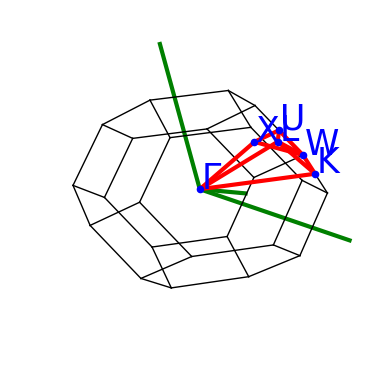

In [34]:
# Visualisation de la zone de Brillouin
bsp = PhononBSPlotter(ph_bs)
bsp.plot_brillouin()

## Calcul de la vitesse de propagation du son

Pour calculer la vitesse de propagation du son, on utilise la relation de dispersion $v = \lvert {\frac{d\omega}{dq}} \rvert$
avec :
- $\omega = 2\pi f$, la fréquence angulaire
- q le vecteur d'onde

Nous devons donc calculer les tangentes des branches acoustiques aux points qui nous intéressent : c-à-d, aux endroits où la dispersion est linéaire. Attention, cette relation n'est valable qu'en régime de grandes longueurs d'onde ($\lambda$ >>, q <<).

On choisit les segments tels qu'ils contiennent le point où la fréquence s'annule :  $\Gamma-X$, $K-\Gamma$ et $\Gamma-L$.

### Branches acoustiques

'\nN.B. :\n\nfreq = [[[...], [...], [...], [...]], \n        [[...], [...], [...], [...]],\n        [[...], [...], [...], [...]]]\n        \nfreq est donc une liste de listes de listes de taille 10 x 9 x 19 :\n- 10 pour le nombre de segments (chemins)\n- 9 pour le nombre de bandes\n- 19 pour le nombre de fréquences\n'

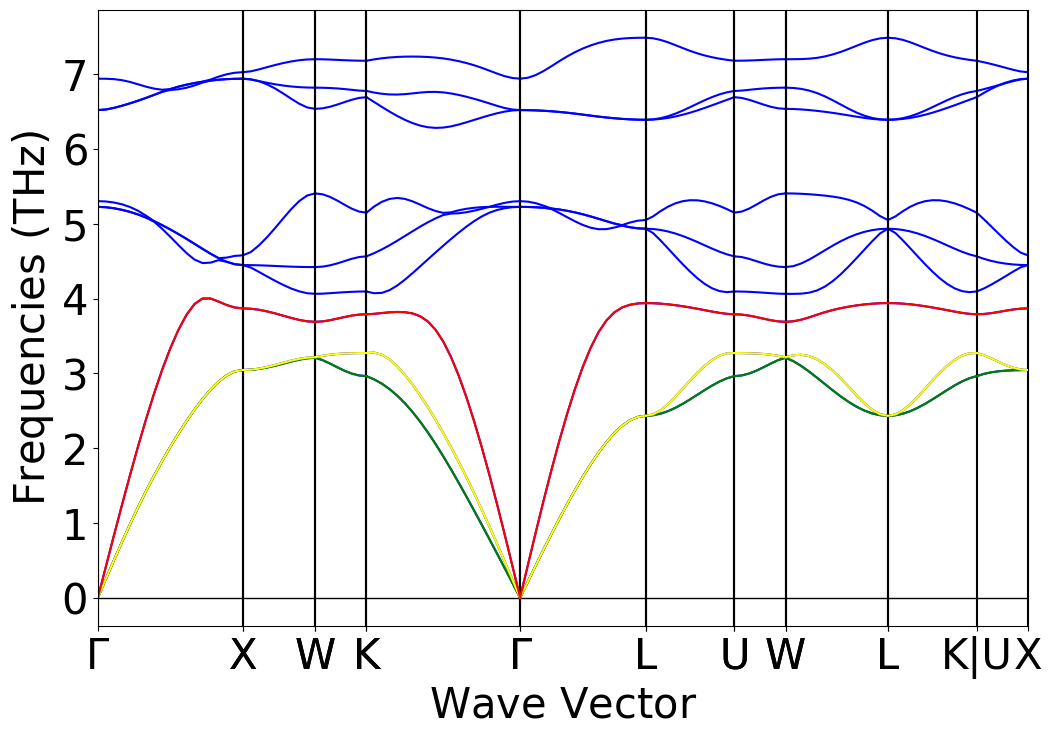

In [35]:
# Coloration des trois branches acoustiques
bsp.get_plot()
data = bsp.bs_plot_data() 
dist = data.get("distances") # distances spatiales parcourues le long de la trajectoire d'une branche spécifique dans l'espace des vecteurs d'onde
freq = data.get("frequency") # liste de listes de listes contenant les fréquences pour chaque mode de vibration
for i in range(len(dist)):
    plt.plot(dist[i], freq[i][0], 'green')
    plt.plot(dist[i], freq[i][1], 'yellow')
    plt.plot(dist[i], freq[i][2], 'red')
    
"""
N.B. :

freq = [[[...], [...], [...], [...]], 
        [[...], [...], [...], [...]],
        [[...], [...], [...], [...]]]
        
freq est donc une liste de listes de listes de taille 10 x 9 x 19 :
- 10 pour le nombre de segments (chemins)
- 9 pour le nombre de bandes
- 19 pour le nombre de fréquences
"""

Nous choisissons de travailler avec les branches acoustiques colorées en rouge, jaune et vert.

### 1) Première direction : $\Gamma - X$  (bande verte)

In [36]:
# On travaille avec des Angström
ang = 10**(-10)

In [37]:
# Direction Gamma-X
# Branche verte -> indice 0 ([][0][])
# ! On convertit les THz en Hz par un facteur 10^-12 !
x00 = dist[0][0]/ang
x01 = dist[0][1]/ang
y00 = 2*np.pi*freq[0][0][0]*10**(12)  
y01 = 2*np.pi*freq[0][0][1]*10**(12)

v0 = abs((y01-y00)/(x01-x00))
print("La vitesse du son pour la branche verte dans la direction Gamma-X vaut", v0, "m/s.")

La vitesse du son pour la branche verte dans la direction Gamma-X vaut 2866.7861578690026 m/s.


### Deuxième direction : $K-\Gamma$ (bande jaune)

In [38]:
# Direction Gamma-K
# Branche jaune -> indice 1 ([][1][])
x10 = dist[3][-1]/ang
x11 = dist[3][-2]/ang
y10 = 2*np.pi*freq[3][1][-1]*10**(12) 
y11 = 2*np.pi*freq[3][1][-2]*10**(12)

v1 = abs((y11-y10)/(x11-x10))
print("La vitesse du son pour la branche jaune dans la direction Gamma-K vaut", v1, "m/s.")

La vitesse du son pour la branche jaune dans la direction Gamma-K vaut 2871.001973029057 m/s.


### Troisième direction : $\Gamma-L$ (bande rouge)

In [40]:
# Direction Gamma-L
# Branche rouge -> indice 2 ([][2][])
x20 = dist[4][0]/ang
x21 = dist[4][1]/ang
y20 = 2*np.pi*freq[4][2][0]*10**(12) 
y21 = 2*np.pi*freq[4][2][1]*10**(12)

v2 = abs((y21-y20)/(x21-x20))
print("La vitesse du son pour la branche rouge dans la direction Gamma-L vaut", v2, "m/s.")

La vitesse du son pour la branche rouge dans la direction Gamma-L vaut 5128.195343233317 m/s.
